# Tutorial 2: Plotting the PMF as a function of frequency

In this tutorial, we show how to prepare a crystal object, that we take to be made out of KTP, then plot the PMF as a function of the two downconverted frequencies. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from custom_poling.core.crystal import Crystal

### Define the periodically poled crystal

In [3]:
# Create a crystal object

domain_width = 22.08095e-06
number_domains = 1000

crystal = Crystal(domain_width,number_domains,z0=0)

In [4]:
# Print some of the crystal's properties

print(f'Crystal length: {crystal.length}')
print(f'Domain wall positions: {crystal.domain_walls}')

Crystal length: 0.022080950000000002
Domain wall positions: [0.00000000e+00 2.20809500e-05 4.41619000e-05 ... 2.20367881e-02
 2.20588691e-02 2.20809500e-02]


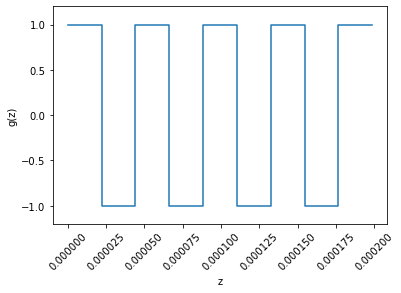

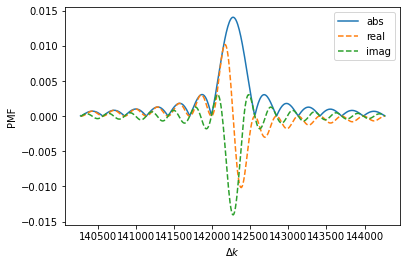

In [5]:
# We expect the peak to be around the k0 for periodic poling

k0=np.pi/domain_width

# Specify and plot the domain configuration

domain_config = [1,-1]*int(number_domains/2)
crystal.plot_domains(domain_config,n_max=10,fix_ticks=True)

# Compute and plot the phase-matching function (PMF) for an periodically-poled crystal

k_array = np.arange(k0-2000,k0+2000,10)
pmf_periodically_poled = crystal.compute_pmf(domain_config,k_array)

# Plot pmf
plt.plot(k_array,np.abs(pmf_periodically_poled),label='abs')
plt.plot(k_array,np.real(pmf_periodically_poled),'--',label='real')
plt.plot(k_array,np.imag(pmf_periodically_poled),'--',label='imag')
plt.xlabel(r'$\Delta k$')
plt.ylabel('PMF')
plt.legend()
plt.show()

### Plot the PMF as a function of frequency

In [6]:
from custom_poling.utils.sellmeier import Sellmeier
from custom_poling.utils.func_to_matrix import func_to_matrix

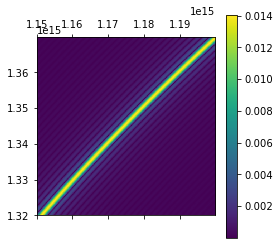

In [7]:
freqs1 = np.arange(1.32e15,1.37e15,.1e12)
freqs2 = np.arange(1.15e15,1.2e15,.1e12)

# Sellmeier equations for KTP

sel_y = Sellmeier(3.0065, 0.03901, 0.04547, 0.01408)
sel_z = Sellmeier(3.3134, 0.05694, 0.05658, 0.01692)

c=3e8
kp = lambda w: w * sel_y.n(2*np.pi*c*1e6/w)/c
ks = lambda w: w * sel_y.n(2*np.pi*c*1e6/w)/c
ki = lambda w: w * sel_z.n(2*np.pi*c*1e6/w)/c

delta_k_func = lambda w1,w2:kp(w1+w2)-ks(w1)-ki(w2)
delta_k_matrix = np.array(func_to_matrix(delta_k_func,freqs1,freqs2))

pmf_matrix = crystal.compute_pmf(domain_config,delta_k_matrix)

plt.matshow(np.abs(pmf_matrix),origin='lower',extent=[freqs2[0],freqs2[-1],freqs1[0],freqs1[-1]]);
plt.colorbar()
plt.show()